Un embedding es una transformacion de un tipo de dato a un vector continuo. Tipicamente son datos de alta dimensionalidad. Se pueden transformar variables categoricas a variables continuas, sabiendo que las redes neuronales trabajan mejor con variables continuas. Un embedding se puede ver como una tablita donde a cada variable se le asigna una tira de numeros. Existe una etapa de entrenamiento en donde se perfecciona la eleccion de los numeros asignados. Una forma de hacerlo es haciendo un vector en donde cada posicion representa a una variable y se le pone un 1 a la variable seleccionada y de ahi se seleccionan los numeros que representa a la variable (Fig 1 del paper). 

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
import pandas as pd
import numpy as np
import datetime
!pip install pandas_summary
from pandas_summary import DataFrameSummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 16.1 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/Redes Neuronales/TP2/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_test = pd.read_feather(path + 'test_normalized_data.fth')

- Para verificar que columnas tiene originalmente tests. Por ejemplo, como es de esperar, la columna customers no es dato y podría intentar estimarse tambien
- Es bastante discutible usar el clima y temperatura (Se puede usar el forecast si es en el futuro
- En un caso real no parece sensato usar google trend

In [ ]:
df_test.columns

Index(['index', 'Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenSince', 'Promo2Since', 'State', 'file', 'week', 'trend',
       'Date_y', 'Month_y', 'Day_y', 'file_DE', 'week_DE', 'trend_DE',
       'Date_DE', 'State_DE', 'Month_DE', 'Day_DE', 'file_y',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
       'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
       'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'Max_Gust_SpeedKm_h',
       'Precipitationmm', 'CloudCove

In [ ]:
df = pd.read_feather(path + 'train_normalized_data.fth')

In [ ]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen', 'Promo2Weeks', 
            'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State', 
            'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_bool_fw', 'StateHoliday_bool_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw']

In [ ]:
contin_vars = ['CompetitionDistance', 
   'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [ ]:
df

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
0,0,0,4,2015-07-31,5263,555,1,1.273237,0,2.144211,...,0.644376,1.072424,0,0,5,0,5,1,0,1
1,1,1,4,2015-07-31,6064,625,1,1.273237,0,2.144211,...,0.965073,1.072424,0,0,5,0,5,1,0,1
2,2,2,4,2015-07-31,8314,821,1,1.273237,0,2.144211,...,0.644376,1.072424,0,0,5,0,5,1,0,1
3,3,3,4,2015-07-31,13995,1498,1,1.273237,0,2.144211,...,0.965073,1.072424,0,0,5,0,5,1,0,1
4,4,4,4,2015-07-31,4822,559,1,1.273237,0,2.144211,...,0.644376,1.072424,0,0,5,0,5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,1016776,681,1,2013-01-01,3375,566,1,-0.785400,1,2.144211,...,-1.183596,1.072424,0,-6,1,1,0,4,1,1
844334,1016827,732,1,2013-01-01,10765,2377,1,-0.785400,1,2.144211,...,-1.183596,1.072424,0,-6,1,1,0,4,1,1
844335,1016863,768,1,2013-01-01,5035,1248,1,-0.785400,1,2.144211,...,-1.183596,1.072424,0,-6,1,1,0,4,1,1
844336,1017042,947,1,2013-01-01,4491,1039,1,-0.785400,1,2.144211,...,-1.183596,1.072424,0,-6,1,1,0,4,2,1


In [ ]:
DataFrameSummary(df[cat_vars]).summary().loc[['uniques', 'types']]

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Promo2SinceYear,State,Week,Events,Promo_fw,Promo_bw,StateHoliday_bool_fw,StateHoliday_bool_bw,SchoolHoliday_fw,SchoolHoliday_bw
uniques,1115,7,3,12,31,4,25,26,4,3,...,8,12,52,22,6,6,3,3,8,8
types,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,...,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric


In [ ]:
uniques = DataFrameSummary(df[cat_vars]).summary().loc[['uniques']]

In [ ]:
uniques

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Promo2SinceYear,State,Week,Events,Promo_fw,Promo_bw,StateHoliday_bool_fw,StateHoliday_bool_bw,SchoolHoliday_fw,SchoolHoliday_bw
uniques,1115,7,3,12,31,4,25,26,4,3,...,8,12,52,22,6,6,3,3,8,8


# Asignación de dimensión de embeddings

In [ ]:
cat_var_dict = {'Store': 50, 'DayOfWeek': 4, 'Year': 2, 'Month': 6,
'Day': 10, 'StateHoliday': 3, 'CompetitionMonthsOpen': 2,
'Promo2Weeks': 1, 'StoreType': 2, 'Assortment': 3, 'PromoInterval': 3,
'CompetitionOpenSinceYear': 4, 'Promo2SinceYear': 4, 'State': 6,
'Week': 2, 'Events': 4, 'Promo_fw': 1,
'Promo_bw': 1, 'StateHoliday_fw': 1,
'StateHoliday_bw': 1, 'SchoolHoliday_fw': 1,
'SchoolHoliday_bw': 1}

## Ejemplo con DayOfWeek, store y CompetitionDistance

In [ ]:
uniques['DayOfWeek'][0]

7

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, Input, Flatten, Dense, Concatenate

In [ ]:
day_of_week_input = Input(shape=(1,), name="day_of_week_input")
store_input = Input(shape=(1,), name="store_input")
# Por ser continua competition_distance no necesita embeddings
competition_distance_input = Input(shape=(1,), name="competition_distance_input")

day_of_week_Embedd_out = Embedding(uniques['DayOfWeek'][0], cat_var_dict['DayOfWeek'], name="day_of_week_Embedd")(day_of_week_input)
store_Embedd_out = Embedding(uniques['Store'][0], cat_var_dict['Store'], name="store_Embedd")(store_input)

In [ ]:
print(f'Entradas: {day_of_week_input.shape}, {store_input.shape}')
print(f'Salidas: {day_of_week_Embedd_out.shape}, {store_Embedd_out.shape}')

Entradas: (None, 1), (None, 1)
Salidas: (None, 1, 4), (None, 1, 50)


In [ ]:
day_of_week_Embedd_flat = Flatten(name="day_of_week_flat")(day_of_week_Embedd_out)
store_Embedd_flat = Flatten(name="store_flat")(store_Embedd_out)

In [ ]:
merged = Concatenate(name='All_Concatenate')([day_of_week_Embedd_flat, store_Embedd_flat, competition_distance_input])

In [ ]:
x = Dense(1000, activation='relu')(merged)
x = Dense(500, activation='relu')(x)
output = Dense(1, activation='linear')(x)

In [ ]:
model = Model([day_of_week_input, store_input, competition_distance_input], output)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 day_of_week_input (InputLayer)  [(None, 1)]         0           []                               
                                                                                                  
 store_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 day_of_week_Embedd (Embedding)  (None, 1, 4)        28          ['day_of_week_input[0][0]']      
                                                                                                  
 store_Embedd (Embedding)       (None, 1, 50)        55750       ['store_input[0][0]']            
                                                                                              

In [ ]:
df_train = df[df.Date < datetime.datetime(2015, 7, 1)]  
df_val = df[df.Date >= datetime.datetime(2015, 7, 1)]

In [ ]:
print(f'Cantidad en val: {len(df_val)}, porcentaje: {len(df_train)/(len(df_train) + len(df_val))}')
# Cantidad en val: 30188, porcentaje: 0.9642465458145908

Cantidad en val: 30188, porcentaje: 0.9642465458145908


In [ ]:
df_train[['DayOfWeek', 'Store', 'CompetitionDistance']].values.shape
# (814150, 3)

(814150, 3)

In [ ]:
X_train = np.hsplit(df_train[['DayOfWeek', 'Store', 'CompetitionDistance']].values, 3)
X_val = np.hsplit(df_val[['DayOfWeek', 'Store', 'CompetitionDistance']].values, 3)

In [ ]:
len(X_train[2]) # 814150

814150

In [ ]:
# Normalización
y_mean = df_train['Sales'].mean()
y_std = df_train['Sales'].std()

# Escala logaritmica
# max_log_y = np.max(np.log(df['Sales']))
# y_train = np.log(df['Sales'])/max_log_y

In [ ]:
y_train = (df_train['Sales'].values - y_mean)/y_std
y_val = (df_val['Sales'].values - y_mean)/y_std

In [ ]:
model.compile(optimizer=Adam(lr=0.001), metrics=['mse'], loss='mse')

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),  epochs=10, batch_size=256)
# antes: 3181/3181 [==============================] - 5s 2ms/step - loss: 0.3350 - mse: 0.3350 - val_loss: 0.2444 - val_mse: 0.2444

Epoch 1/10
3181/3181 [==============================] - 89s 28ms/step - loss: 0.3129 - mse: 0.3129 - val_loss: 0.2364 - val_mse: 0.2364
Epoch 2/10
3181/3181 [==============================] - 87s 27ms/step - loss: 0.3095 - mse: 0.3095 - val_loss: 0.2379 - val_mse: 0.2379
Epoch 3/10
3181/3181 [==============================] - 87s 27ms/step - loss: 0.3076 - mse: 0.3076 - val_loss: 0.2328 - val_mse: 0.2328
Epoch 4/10
3181/3181 [==============================] - 84s 27ms/step - loss: 0.3064 - mse: 0.3064 - val_loss: 0.2375 - val_mse: 0.2375
Epoch 5/10
3181/3181 [==============================] - 88s 28ms/step - loss: 0.3056 - mse: 0.3056 - val_loss: 0.2302 - val_mse: 0.2302
Epoch 6/10
3181/3181 [==============================] - 85s 27ms/step - loss: 0.3048 - mse: 0.3048 - val_loss: 0.2318 - val_mse: 0.2318
Epoch 7/10
3181/3181 [==============================] - 87s 27ms/step - loss: 0.3042 - mse: 0.3042 - val_loss: 0.2303 - val_mse: 0.2303
Epoch 8/10
3181/3181 [==========================

# Métrica

$$
\textrm{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(\frac{\hat{y}_i - y_i}{y_i}\right)^2}
$$

In [ ]:
y_pred_norm = model.predict(X_val, verbose=1)
y_pred = y_pred_norm*y_std + y_mean
# y_pred = np.exp(model.predict(X_train)*max_log_y)

944/944 [==============================] - 4s 4ms/step


In [ ]:
def root_mean_squared_error_np(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_pred - y_true)), axis=-1))

def rmspe_np(y_true, y_pred):
    MSEP_ = ((y_true - y_pred)/y_true)**2
    return np.sqrt(MSEP_.mean())

In [ ]:
rmspe_np(df_val['Sales'].values, y_pred.reshape(-1))

0.22290882344017499

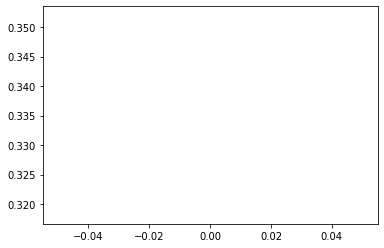

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.show()

# por que esta esto si hay un solo epoch?